In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
import bayesoptlib as BO


 /Users/dkrishnamoorthy/Dropbox/Python/ECCBO/bayesoptlib.py:95: SyntaxWarning:"is" with a literal. Did you mean "=="?
 /Users/dkrishnamoorthy/Dropbox/Python/ECCBO/bayesoptlib.py:102: SyntaxWarning:"is" with a literal. Did you mean "=="?
 /Users/dkrishnamoorthy/Dropbox/Python/ECCBO/bayesoptlib.py:115: SyntaxWarning:"is" with a literal. Did you mean "=="?
 /Users/dkrishnamoorthy/Dropbox/Python/ECCBO/bayesoptlib.py:411: SyntaxWarning:"is" with a literal. Did you mean "=="?
 /Users/dkrishnamoorthy/Dropbox/Python/ECCBO/bayesoptlib.py:418: SyntaxWarning:"is" with a literal. Did you mean "=="?
 /Users/dkrishnamoorthy/Dropbox/Python/ECCBO/bayesoptlib.py:431: SyntaxWarning:"is" with a literal. Did you mean "=="?


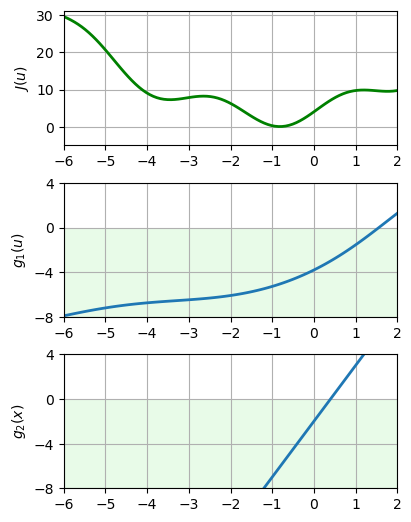

In [13]:
def f(x,a,b=-10):
    return (1*(x+(1*a))**2) + 3*np.sin(2*x) - 2*x

def g1(x,a=0):
    return (3+a)*x +2-2*np.abs(a)

def g2(x,a):
    return 10*(1/(1+np.exp(-(x-a)))) -5+ 0.3*np.sin(x) + 0.5*x

a = 2
inputDim = 3

x = np.linspace(-6,2.5,100)
plot = True
if plot is True:
    import matplotlib.gridspec as gridspec
    fig = plt.figure(constrained_layout=True,figsize=(4, 6))
    spec = gridspec.GridSpec(ncols=1, nrows=11, figure=fig)
    ax1 = fig.add_subplot(spec[0:3, 0])
    ax2 = fig.add_subplot(spec[3:6, 0])
    if inputDim ==3:
        ax3 = fig.add_subplot(spec[6:9, 0])

    ax1.plot(x, f(x, a), 'g', linewidth=2)
    ax1.set_xlim([-6, 2])
    ax1.set_ylabel('$J(u)$')
    if a==-1.5:
        ax1.set_ylim([-15, 60])
        #ax1.set_yticks([ -15,0, 15,30,45,60])
    if a==2 or a ==0:
        ax1.set_ylim([-5, 31])
        #ax1.set_yticks([ 0, 10,20,30])
    ax1.grid()

    
    if inputDim ==3:
        ax3.plot(x, g1(x, a), linewidth=2)
        ax3.set_xlim([-6, 2])
        ax3.set_ylabel('$g_2(x)$')
        ax3.set_ylim([-8, 4])
        ax3.set_yticks([-8, -4, 0, 4])
        ax3.axhspan(-8, 0, facecolor='lightgreen', alpha=0.2)
        ax3.grid()

        ax2.plot(x, g2(x, a), linewidth=2)
        ax2.set_xlim([-6, 2])
        ax2.set_ylim([-8, 4])
        ax2.set_yticks([-8, -4, 0, 4])
        ax2.axhspan(-8, 0, facecolor='lightgreen', alpha=0.2)
        ax2.set_ylabel('$g_1(u)$')
        ax2.grid()
    else:
        ax2.plot(x, g2(x, a), linewidth=2)
        ax2.set_xlim([-6, 2])
        ax2.set_ylabel('$g_1(u)$')
        ax2.set_ylim([-8, 4])
        ax2.set_yticks([-8, -4, 0, 4])
        ax2.axhspan(-8, 0, facecolor='lightgreen', alpha=0.2)
        ax2.grid()
    fig.savefig('Ex2_g2.pdf',bbox_inches='tight')

y1sp = 0
y2sp = 0


In [27]:


u1 = 0
u2 = 0
x = -8
y1 = g1(x,a)
y2 = g2(x,a)
for i in range(30):
    if inputDim==3:
        x1 = x + 0.2*(y1sp-y1)
        x2 = x + 0.2*(y2sp-y2)
        x = min(x1,x2)
    else:
        x = x + 0.2*(y2sp-y2)
    y1 = g1(x,a)
    y2 = g2(x,a)
    f0 = f(x,a)


if inputDim==3:
    Z_sample = np.concatenate((np.array(y1sp).reshape(-1,1),np.array(y1sp).reshape(-1,1)),axis=1)
    ZD_sample = np.concatenate((Z_sample,np.array(a).reshape(-1,1)),axis=1)
    J_sample = np.array(y1sp).reshape(1,1) # Cost

    var0 = 100
    kernel_f = GPy.kern.RBF(inputDim,ARD = True, lengthscale=[2,3,1],variance=var0) #+ GPy.kern.Bias(inputDim) 
    bounds = np.array([[-5,0],[-5,0]]) # bounds for Fb

else:
    Z_sample = np.array(u2).reshape(-1,1)
    ZD_sample = np.concatenate((Z_sample,np.array(a).reshape(-1,1)),axis=1)
    J_sample = np.array(f0).reshape(1,1) # Cost


    var0 = 100
    kernel_f = GPy.kern.RBF(inputDim,ARD = True, lengthscale=[2,1],variance=var0) #+ GPy.kern.Bias(inputDim) 
    bounds = np.array([[-7,0]]) # bounds for Fb

U_range = np.linspace(bounds[:, 0].T, bounds[:, 1].T, 1000).reshape(1000,-1)


Jt = []
y1t = []
y2t = []
y1spt = []
y2spt = []
xt = []
Joptt = []
dt = []
for sim_k in range(60):
    if sim_k<15:
        a = -1.5
        Jopt= 7.15
    if sim_k>=15:
        a = 0
        Jopt= -1.14
    if sim_k>=30:
        a = 2
        Jopt= 0

    if sim_k==15 or sim_k ==30:
        Z_sample = np.concatenate((np.array(y1sp).reshape(-1,1),np.array(y1sp).reshape(-1,1)),axis=1)
        ZD_sample = np.concatenate((Z_sample,np.array(a).reshape(-1,1)),axis=1)
        J_sample = np.array(y1sp).reshape(1,1) # Cost
        
    Context = np.array(a).reshape(-1,1)
    J_Obj = BO.contextual_bayesian_optimization(ZD_sample,J_sample,
                                                Context,bounds,kernel_f, X_grid = U_range)

    
    # Update the posterior
    J_Obj.fit_gp()
    if sim_k ==5:
        J_Obj.optimize_fit()
    J_Obj.query_next('UCB')
    if inputDim==3:
        y1sp = J_Obj.X_next[0][0]
        y2sp = J_Obj.X_next[0][1]
    else:
        y2sp = J_Obj.X_next[0][0]
        y1sp = y2sp


    # system query
    for j in range(40):
        if inputDim==3:
            x1 = x + 0.2*(y1sp-y1)
            x2 = x + 0.2*(y2sp-y2)
            x = min(x1,x2)
        else:
            x = x + 0.2*(y2sp-y2)
        y1 = g1(x,a)
        y2 = g2(x,a)
        f0 = f(x,a)
        Jt.append(f0)
        y1t.append(y1)
        y2t.append(y2)
        xt.append(x)
        y1spt.append(y1sp)
        y2spt.append(y2sp)
        Joptt.append(Jopt)
        dt.append(a)
    
    if inputDim==3:
        Z_sample = np.vstack((Z_sample, [[y1sp,y2sp]]))
    else:
        Z_sample = np.vstack((Z_sample, [[y2sp]]))
    ZD_sample = np.vstack((ZD_sample, J_Obj.X_next))
    J_sample = np.vstack((J_sample, f0))
    
    '''     fig = plt.figure(constrained_layout=True,figsize=(4, 6))
    spec = gridspec.GridSpec(ncols=1, nrows=11, figure=fig)
    ax1 = fig.add_subplot(spec[0:3, 0])
    ax2 = fig.add_subplot(spec[3:6, 0])
    #ax3 = fig.add_subplot(spec[6:9, 0])

    ax1.plot( Jt, 'g', linewidth=2)
    ax1.set_ylabel('$f^0(x)$')
    #ax1.set_ylim([-1, 31])
    ax1.set_xlim([0, 400])
    #ax1.set_yticks([ 0, 10,20,30])
    ax1.set_ylim([-15, 60])
    ax1.set_yticks([ -15,0, 15,30,45,60])
    ax1.grid()

    ax2.plot(y2spt,'k:')
    ax2.plot(y2t, linewidth=1.5)
    ax2.set_ylabel('$g(x)$')
    ax2.set_ylim([-8, 4])
    ax2.set_xlim([0, 400])
    ax2.set_yticks([-8, -4, 0, 4])
    ax2.axhspan(-8, 0, facecolor='lightgreen', alpha=0.2)
    ax2.grid()
    fig.savefig('Ex2_f_ts'+str(sim_k)+'.pdf',bbox_inches='tight')

    #J_Obj.plot_GP_context(X_sample=Z_sample,Y_sample=J_sample,context = Context)
    '''


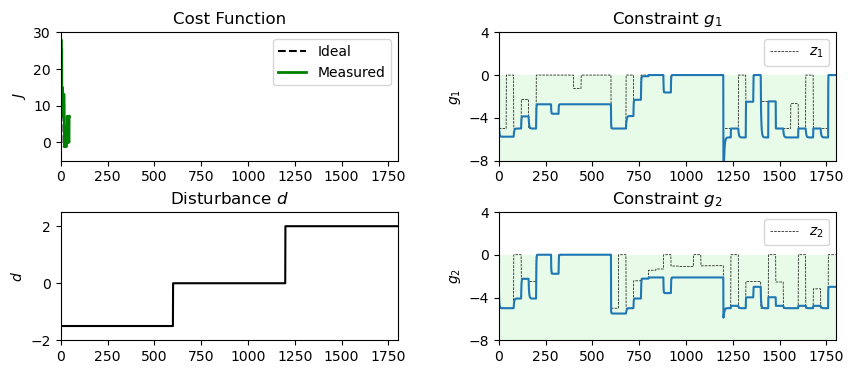

In [97]:
# Create a 2x2 plot layout with each subplot 3x longer than tall
fig = plt.figure(figsize=(10, 4))  # Aspect ratio of 3x1 for each subplot
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig, wspace=0.3, hspace=0.4)

iter = np.linspace(0,45,3*600)
ax1 = fig.add_subplot(spec[0, 0])  # Top-left
ax2 = fig.add_subplot(spec[0, 1])  # Top-right
ax4 = fig.add_subplot(spec[1, 0])  # Bottom-left
ax3 = fig.add_subplot(spec[1, 1])  # Bottom-right

# First subplot
ax1.plot(iter,Joptt, 'k--', linewidth=1.5, label='Ideal')
ax1.plot(iter,Jt, 'g', linewidth=2, label='Measured')
ax1.set_ylabel('$J$')
ax1.set_xlim([0, 3*600])
ax1.set_ylim([-5, 30])
ax1.legend()
ax1.set_title('Cost Function')

# Second subplot
ax2.plot(y1spt, 'k--', linewidth=0.5, label='$z_1$')
ax2.plot(y1t, linewidth=1.5)
ax2.set_ylabel('$g_1$')
ax2.set_ylim([-8, 4])
ax2.set_xlim([0, 3*600])
ax2.set_yticks([-8, -4, 0, 4])
ax2.axhspan(-8, 0, facecolor='lightgreen', alpha=0.2)
ax2.legend()
ax2.set_title('Constraint $g_1$')

# Third subplot (Bottom-left)
ax3.plot(y2spt, 'k--', linewidth=0.5, label='$z_2$')
ax3.plot(y2t, linewidth=1.5)
ax3.set_ylabel('$g_2$')
ax3.set_ylim([-8, 4])
ax3.set_xlim([0, 3*600])
ax3.set_yticks([-8, -4, 0, 4])
ax3.axhspan(-8, 0, facecolor='lightgreen', alpha=0.2)
ax3.legend()
ax3.set_title('Constraint $g_2$')

# Fourth subplot (Bottom-right)
ax4.plot(dt, 'k', linewidth=1.5)
ax4.set_ylabel('$d$')
ax4.set_ylim([-2, 2.5])
ax4.set_xlim([0, 3*600])
ax4.set_title('Disturbance $d$')
fig.savefig('Ex1_ts.pdf',bbox_inches='tight')
# Display the plot
plt.show()